We will be focusing on an RC discharging circuit as shown in the image below:
<div style="display: flex; align-items: center;">

  <img src="Resources\rc_discharge_circuit.webp" alt="RC Discharging Circuit" width = "300" style="margin-right: 20px;"/>
    <p style="max-width: 400px;">The circuit consists of a resistor (R) and a capacitor (C) connected in series, with the capacitor fully charged.</p>  
</div>

Kirchhoff's voltage law states that the sum of the potential differences (voltage) around any closed loop in a circuit must equal zero.
Starting from the lower left corner and moving counterclockwise, we can write the equation for the circuit as follows:
$$ V_c + V_r = 0 $$

Where:
- $ V_c \quad \rightarrow \quad$ is the voltage across the capacitor
- $ V_r \quad \rightarrow \quad$ is the voltage drop in the resistor
Rearranging the equation gives us:
$$ V_c = -V_r $$   
Using Ohm's law, we can express the voltage drop across the resistor as:
$$ V_r = I \cdot R $$
Substituting this into the previous equation gives us:
$$ V_c = -I \cdot R $$
Electric current (I) is defined as the rate of flow of electric charge (Q) with respect to time (t).<br>
Now, we can express the current in terms of the capacitor's charge:
$$ I = \frac{dQ}{dt} $$
Substituting this into the equation gives us:
$$ V_c = -\frac{dQ}{dt} \cdot R $$
Capacitance $C$ is defined as the amount of electric charge $Q$ stored per unit voltage $V$ across the plates of a capacitor:
$$ C = \frac{Q}{V} $$
Rearranging this gives us:
$$ Q = C \cdot V $$
Thus, the voltage across the capacitor can be expressed as:
$$ V_c = \frac{Q}{C} $$
Substituting this into the equation gives us:
$$ \frac{Q}{C} = -\frac{dQ}{dt} \cdot R $$
Rearranging this equation leads us to the differential equation:
$$ \frac{dQ}{dt} + \frac{1}{RC} Q = 0 $$   
This is a first-order linear ordinary differential equation. The solution to this equation can be found using the method of separation of variables or integrating factor method. The general solution is given by:
$$ Q(t) = Q_0 e^{-\frac{t}{RC}} $$
Where:
- $ Q_0 \quad \rightarrow \quad$ is the initial charge on the capacitor at time $ t = 0 $.
The voltage across the capacitor can be expressed as:
$$ V(t) = \frac{Q(t)}{C} = \frac{Q_0}{C} e^{-\frac{t}{RC}} = V_0 e^{-\frac{t}{RC}} $$
Where:
- $ V(t) \quad \rightarrow \quad$ is the voltage across the capacitor at time $ t $.
- $ C \quad \rightarrow \quad$ is the capacitance of the capacitor.
- $ Q(t) \quad \rightarrow \quad$ is the charge on the capacitor at time $ t $.

The current in the circuit can also be expressed as:
$$ I(t) = \frac{dQ}{dt} = -\frac{Q_0}{RC} e^{-\frac{t}{RC}} = -I_0 e^{-\frac{t}{RC}} $$
Where:
- $ I(t) \quad \rightarrow \quad$ is the current in the circuit at time $ t $.
- $ R \quad \rightarrow \quad$ is the resistance in the circuit.

Lets include the required libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

Lets define the parameters of the circuit.<br>
We will also define the time constant $\tau$ of the circuit, which will be used to limit the time of the simulation.
$$\tau = R \cdot C$$
The time constant $\tau$ is the time it takes for the voltage across the capacitor to decay to approximately 37% of its initial value.
$5\tau$ is typically used to ensure that the capacitor is fully discharged in the simulation.

In [2]:
V_0 = 5.0  # Initial voltage across the capacitor in volts
R = 1000.0  # Resistance in ohms
C = 0.001  # Capacitance in farads 

tau = R * C  # Time constant in seconds
t = np.linspace(0, 5 * tau, 1000)  # Time array from 0 to 5 tau

V = V_0 * np.exp(-t / tau)  # Voltage across the capacitor as a function of time
I = -V_0 / R  * np.exp(-t / tau)  # Current in the circuit as a function of time
Q = C * V  # Charge on the capacitor as a function of time

Lets plot charge Vs time

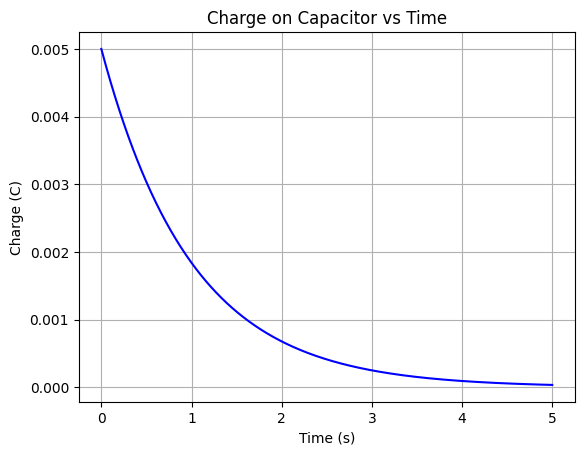

In [3]:
plt.figure()
plt.plot(t, Q, color='blue')
plt.title("Charge on Capacitor vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Charge (C)")
plt.grid(True)
plt.show()

Lets plot voltage Vs time

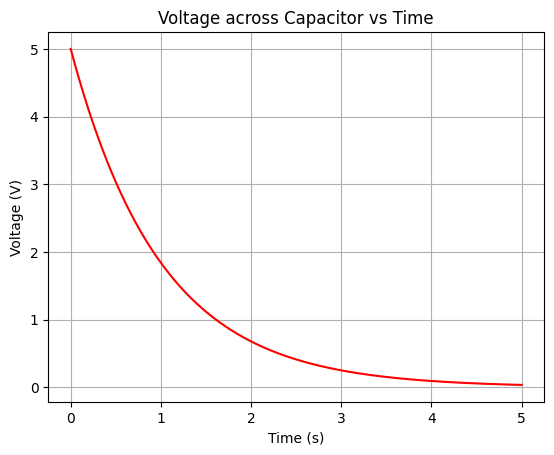

In [4]:
plt.figure()
plt.plot(t, V, color='red')
plt.title("Voltage across Capacitor vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.grid(True)
plt.show()

lets plot current Vs time

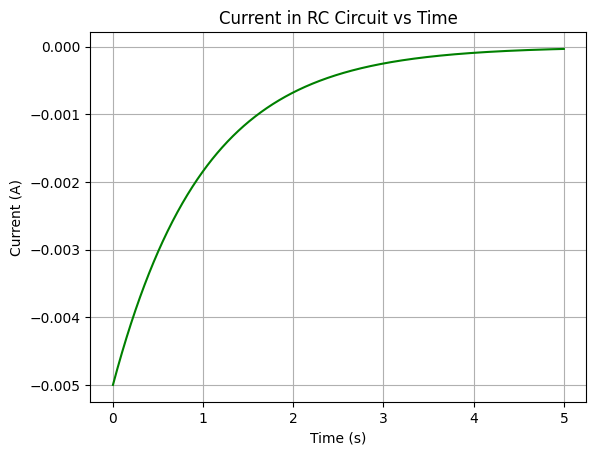

In [5]:
plt.figure()
plt.plot(t, I, color='green')
plt.title("Current in RC Circuit vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")
plt.grid(True)
plt.show()

Lets animate voltage

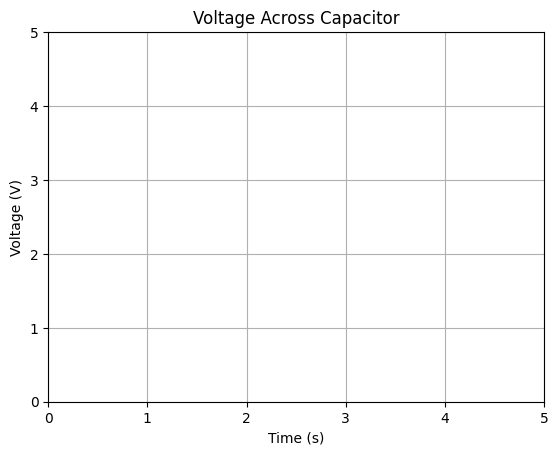

In [6]:

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2, color='red')
ax.set_xlim(0, t[-1])
ax.set_ylim(0, V_0)
ax.set_title("Voltage Across Capacitor")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Voltage (V)")
ax.grid(True)

def init():
    line.set_data([], [])
    return line,

def update(frame):
    line.set_data(t[:frame], V[:frame])
    return line,

ani_voltage = FuncAnimation(fig, update, frames=len(t), init_func=init, blit=True, interval=10)
plt.show()

#to save the video file for viewing purposes
ani_voltage.save("voltage_discharge.gif", writer='pillow')


Upon successfully running the cells you will get the output below:

![Voltage Discharge](Resources/voltage_discharge.gif)

you can find the video output in the resources folder.


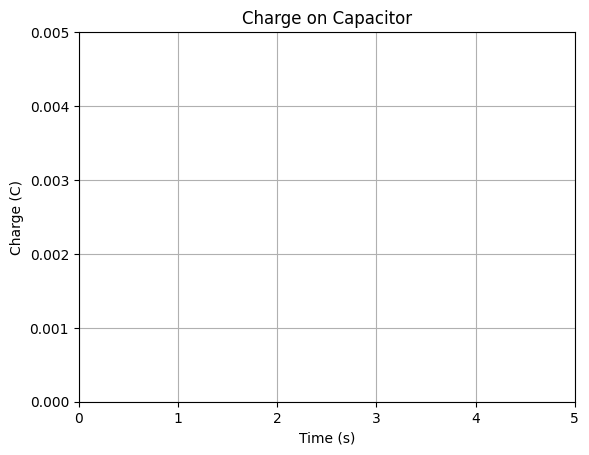

In [7]:

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2, color='blue')
ax.set_xlim(0, t[-1])
ax.set_ylim(0, C * V_0)
ax.set_title("Charge on Capacitor")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Charge (C)")
ax.grid(True)

def update(frame):
    line.set_data(t[:frame], Q[:frame])
    return line,

ani_charge = FuncAnimation(fig, update, frames=len(t), init_func=init, blit=True, interval=10)
plt.show()

#to save the video file for viewing purposes
ani_charge.save("charge_discharge.gif", writer='pillow')

Upon successfully running the cells you will get the output below:

![Charge Discharge](Resources/charge_discharge.gif)

you can find the video output in the resources folder.

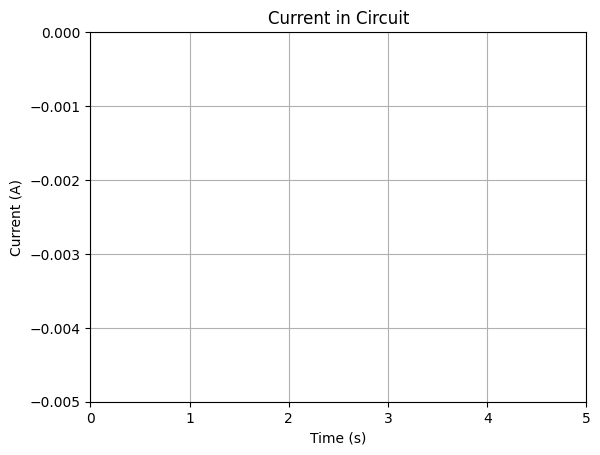

In [8]:

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2, color='green')
ax.set_xlim(0, t[-1])
ax.set_ylim(min(I), 0)
ax.set_title("Current in Circuit")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Current (A)")
ax.grid(True)

def update(frame):
    line.set_data(t[:frame], I[:frame])
    return line,

ani_current = FuncAnimation(fig, update, frames=len(t), init_func=init, blit=True, interval=10)
plt.show()

#to save the video file for viewing purposes
ani_current.save("current_discharge.gif", writer='pillow')

Upon successfully running the cells you will get the output below:

![Current Discharge](Resources/current_discharge.gif)

you can find the video output in the resources folder.